In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25676\981345788.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


What is the distribution of Purchase Amount (USD) for different Subscription Status values?

Plot using both Seaborn’s boxplot and Matplotlib’s histogram.
Are there any outliers?

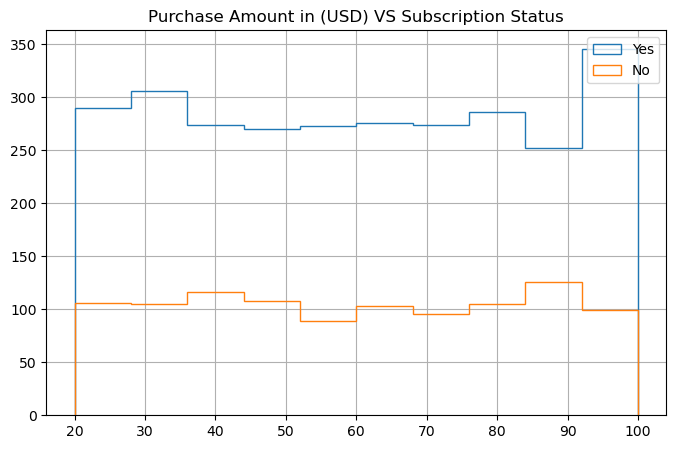

In [2]:
plt.figure(figsize = (8, 5))
df.groupby("Subscription Status")["Purchase Amount (USD)"].hist(histtype="step")
plt.title("Purchase Amount in (USD) VS Subscription Status")
plt.legend(["Yes", "No"])
plt.show();

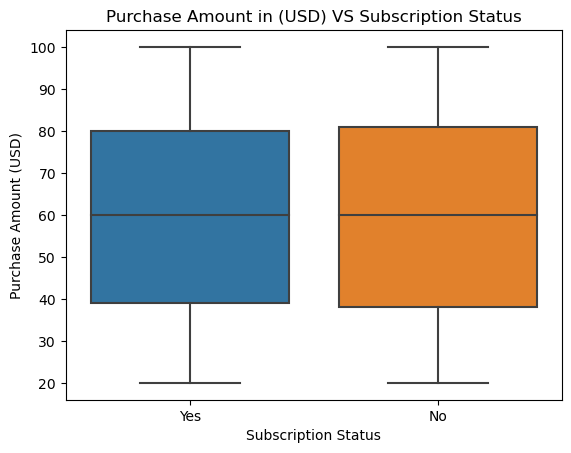

In [3]:
sns.boxplot(x = "Subscription Status", y = "Purchase Amount (USD)", data = df)
plt.xlabel("Subscription Status")
plt.ylabel("Purchase Amount (USD)")
plt.title("Purchase Amount in (USD) VS Subscription Status")
plt.show();

## From the boxplot we conclude that they have the same distribution exactly, but in the histogram we saw that "Yes" subscription status has more purchase amount in USD than that of "No" subscription status

Question 2
Compare the frequency of each Payment Method across the dataset from highest to lowest .

Use both Seaborn's countplot and Matplotlib's bar plot.

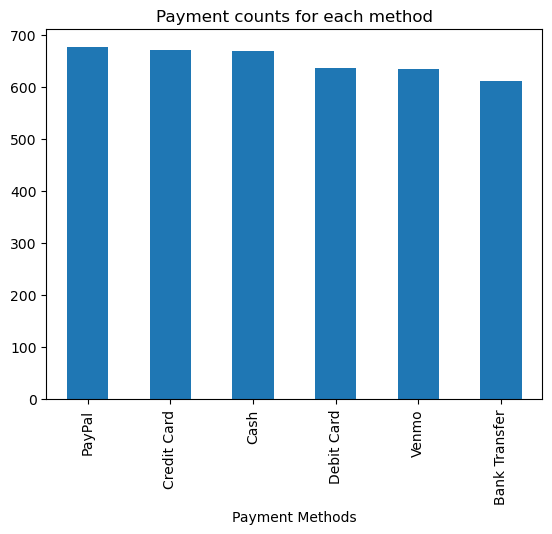

In [4]:
df["Payment Method"].value_counts(sort=True).plot(kind="bar")
plt.title("Payment counts for each method")
plt.xlabel("Payment Methods")
plt.show();

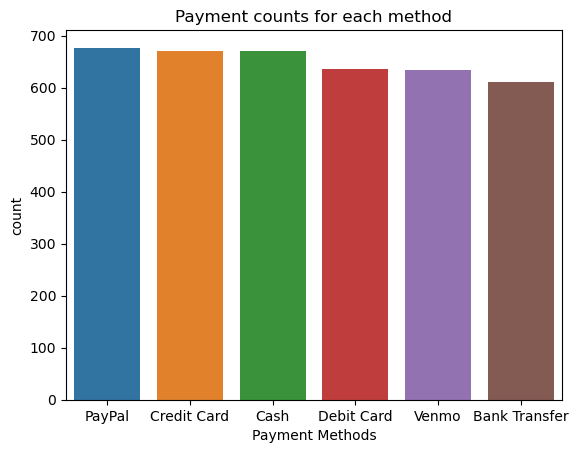

In [5]:
order = df["Payment Method"].value_counts(sort=True).index
sns.countplot(x = "Payment Method", data = df, order = order)
plt.title("Payment counts for each method")
plt.xlabel("Payment Methods")
plt.show();

## From the two plots we conclude that, the most used payment method is PayPal and the the least used payment method is the Bank Transfer but the difference is not that big

Question 3
Show the number of purchases made by each Gender in each Season.

Create a grouped bar chart/ Pie chart using Matplotlib.
Also plot a stacked countplot using Seaborn.

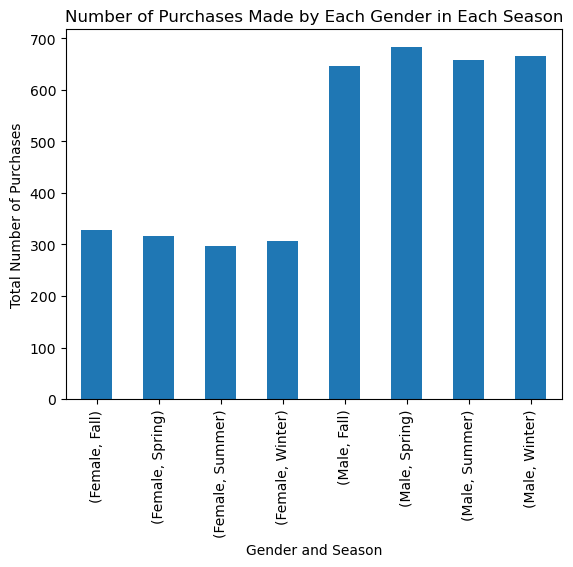

In [6]:
df.groupby(by=["Gender", "Season"])["Item Purchased"].count().plot(kind= "bar")
plt.title("Number of Purchases Made by Each Gender in Each Season")
plt.xlabel("Gender and Season")
plt.ylabel("Total Number of Purchases")
plt.show();

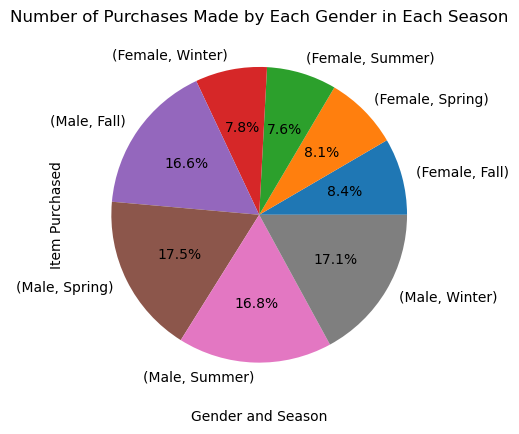

In [7]:
df.groupby(by=["Gender", "Season"])["Item Purchased"].count().plot(kind= "pie", autopct = "%1.1f%%")
plt.title("Number of Purchases Made by Each Gender in Each Season")
plt.xlabel("Gender and Season")
plt.show();

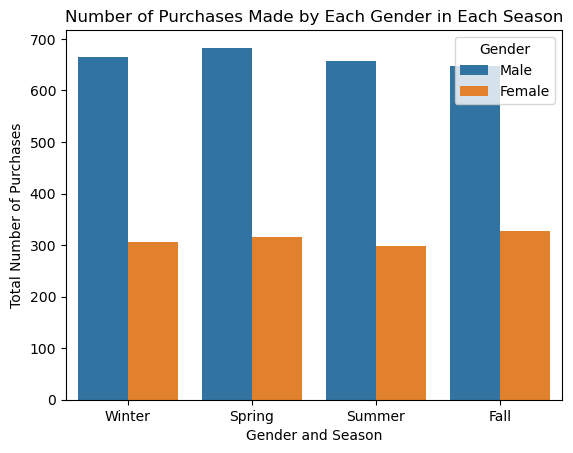

In [8]:
sns.countplot(x = "Season", hue = "Gender", data = df)
plt.title("Number of Purchases Made by Each Gender in Each Season")
plt.xlabel("Gender and Season")
plt.ylabel("Total Number of Purchases")
plt.show();

## Three graphes admitted that male purchases in the four seasons are more than female purchases, and the most season purchases for males is the spring and lowest season is the fall. while the most purchase season for female is fall and the lowest one is summer 

Question 4
Create a heatmap showing the correlation between all numeric columns.

Use sns.heatmap.
Interpret the relationship between Previous Purchases, Purchase Amount, and Review Rating.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

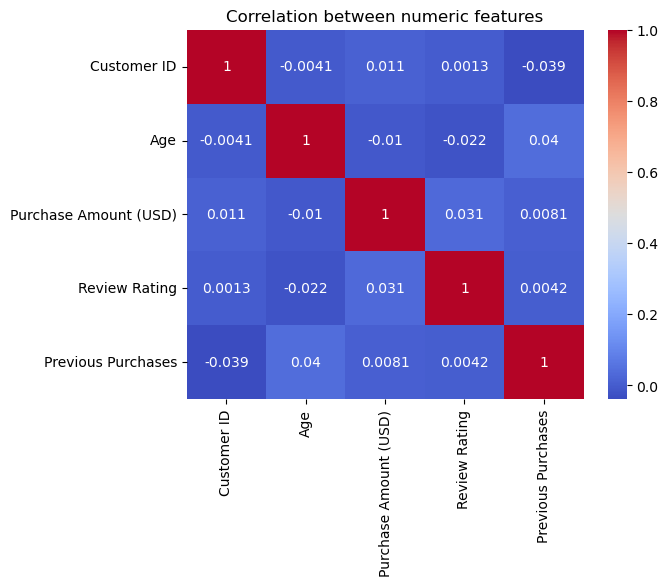

In [10]:
numeric_features = df.select_dtypes(include = ["int64", "float64"])
corr = numeric_features.corr()
sns.heatmap(corr, annot= True, cmap= "coolwarm")
plt.title("Correlation between numeric features")
plt.show();

## The correlation between previous purchase and purchase amount is 0.0081 indicated that is very weak, while the relationship between previous purchase and review rating is 0.0042 indicated also it's very weak. while the relationship between purchase amount and review rating 0.031 indicated also it's weak 

Create a scatter plot of Age vs Purchase Amount (USD), color-coded by Gender.

Use Matplotlib and Seaborn side-by-side.
Add a trend line in Seaborn using regplot.

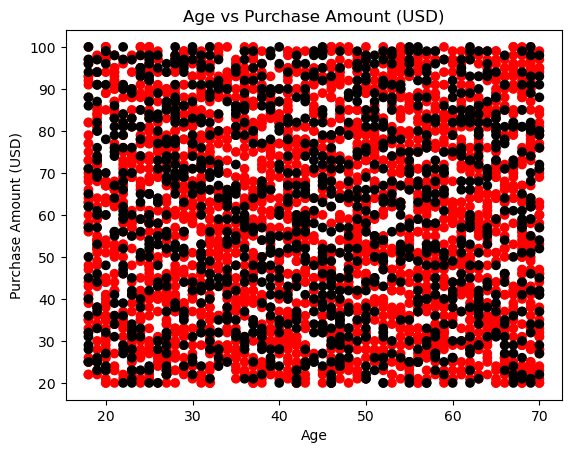

In [11]:
colors = df["Gender"].map({"Male":"red", "Female": "black"})
plt.scatter(x = df["Age"], y = df["Purchase Amount (USD)"], c = colors)
plt.title("Age vs Purchase Amount (USD)")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show();

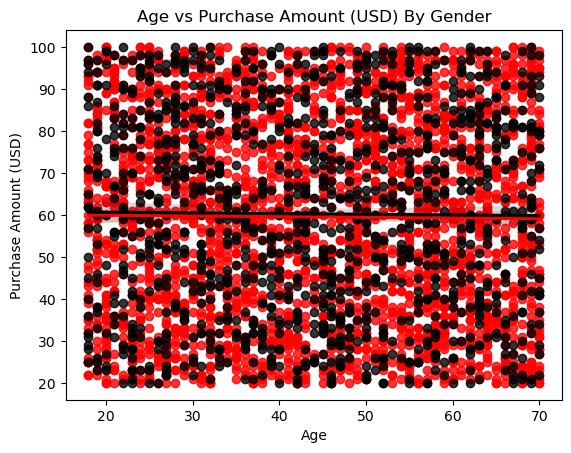

In [12]:
male = df[df["Gender"] == "Male"]
female = df[df["Gender"] == "Female"]
sns.regplot(x = "Age", y = "Purchase Amount (USD)", color = "red" ,data = male)
sns.regplot(x = "Age", y = "Purchase Amount (USD)", color = "black" ,data = female)
plt.title("Age vs Purchase Amount (USD) By Gender")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.show();

## Very messy plot show that there is weak relationship between either age and gender and Purchase Amount (USD)

Question 6
How does the average review rating differ across different item Categories and Sizes?

Use Seaborn’s heatmap or pivot heatmap to visualize.
Use Pandas pivot table to prepare the data.

Size                L         M         S        XL
Category                                           
Accessories  3.736808  3.766192  3.785652  3.819858
Clothing     3.747193  3.692159  3.762676  3.729897
Footwear     3.797093  3.711236  3.865591  3.986567
Outerwear    3.751613  3.693243  3.858929  3.792593



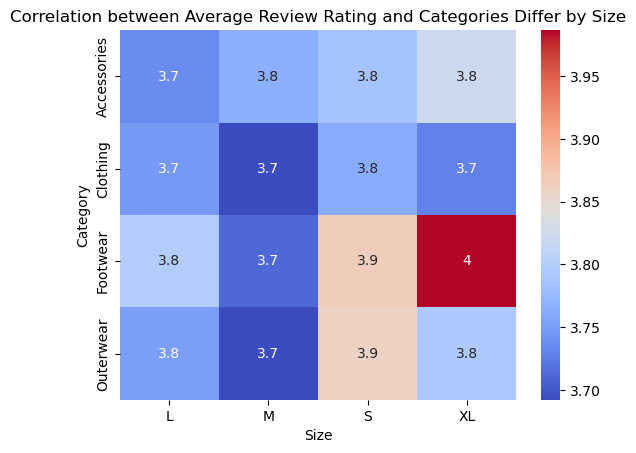

In [13]:
pivot = df.pivot_table(values = "Review Rating", index = "Category", columns = "Size", aggfunc = "mean")
print(pivot)
print()
sns.heatmap(pivot, annot = True, cmap = "coolwarm")
plt.title("Correlation between Average Review Rating and Categories Differ by Size")
plt.show();

Question 7
Which combinations of Season and Shipping Type lead to the highest average Purchase Amount (USD)?

Show this as a grouped bar chart and as a heatmap.

In [14]:
pivot = df.pivot_table(values = "Purchase Amount (USD)", index = "Shipping Type", columns = "Season", aggfunc = "mean")
pivot

Season,Fall,Spring,Summer,Winter
Shipping Type,,,,
2-Day Shipping,61.928571,58.157303,60.089655,63.186667
Express,63.159763,57.739884,58.337931,62.547170
Free Shipping,60.660714,61.682927,60.474860,58.810976
Next Day Air,59.771930,58.453333,58.238411,58.011364
Standard,61.380952,56.522293,56.903614,58.901840
Store Pickup,62.641379,59.774011,56.449704,61.182390


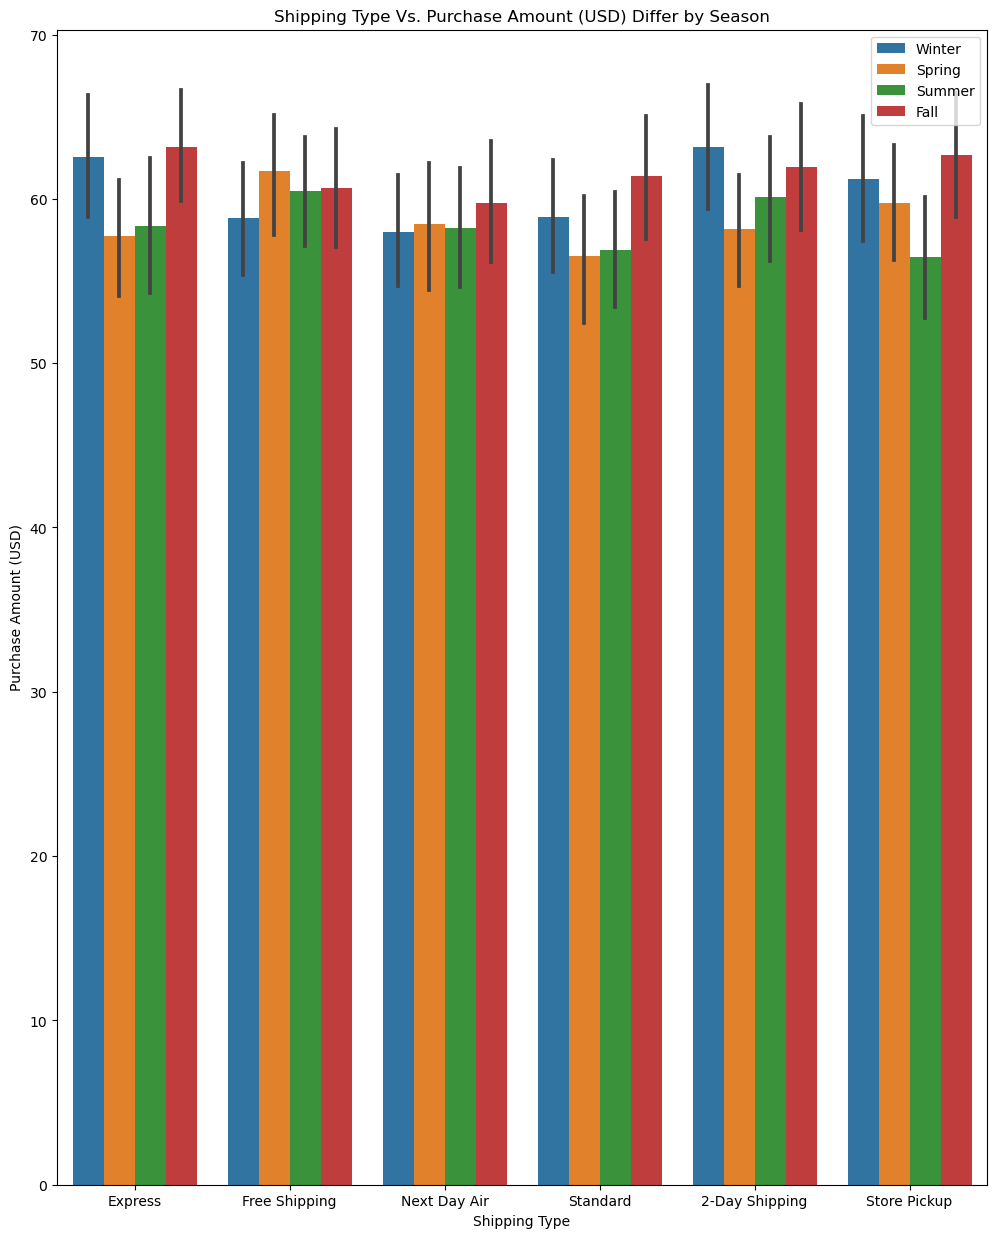

In [15]:
plt.figure(figsize = (12, 15))
sns.barplot(x = "Shipping Type", y = "Purchase Amount (USD)", hue = "Season", data = df)
plt.title("Shipping Type Vs. Purchase Amount (USD) Differ by Season")
plt.xlabel("Shipping Type")
plt.ylabel("Purchase Amount (USD)")
plt.legend(loc = "upper right")
plt.show();

## The combinations of Season and Shipping Type lead to the highest average Purchase Amount (USD) happen is winter season by 2-day shipping and by small difference amount happen in fall season by Express 

Question 8
Plot a violin plot of Review Rating by Gender for each Subscription Status.

Use sns.violinplot with hue.

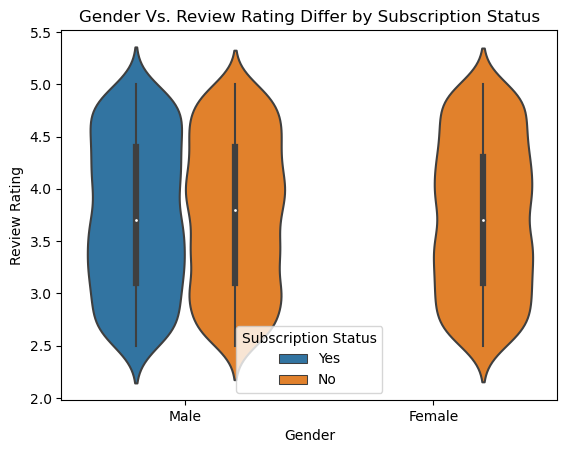

In [16]:
sns.violinplot(x = "Gender", y = "Review Rating", hue = "Subscription Status", data = df)
plt.title("Gender Vs. Review Rating Differ by Subscription Status")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.show();

## The violin plot show that females has no "Yes" Subscription Status, while man has both "Yes" and "No" Subscription Status with "No" Subscription Status has more review rating than "Yes"

Question 9
What are the top 5 most purchased Item Purchased by total Purchase Amount?

Use Pandas aggregation, plot with Matplotlib pie and bar charts.

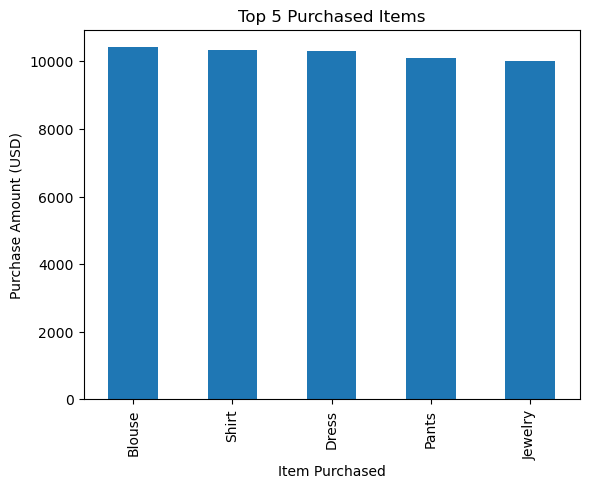

In [17]:
df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending = False).head().plot(kind = "bar")
plt.title("Top 5 Purchased Items")
plt.xlabel("Item Purchased")
plt.ylabel("Purchase Amount (USD)")
plt.show();

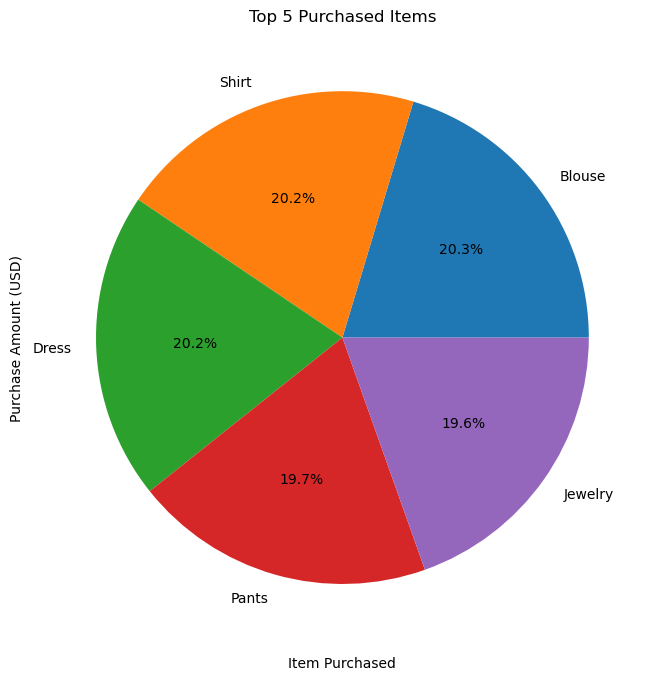

In [18]:
plt.figure(figsize = (10, 8))
df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().sort_values(ascending = False).head(5).plot(kind = "pie", autopct = "%1.1f%%")
plt.title("Top 5 Purchased Items")
plt.xlabel("Item Purchased")
plt.show();

## the top 5 purchased items are: Shirt - Dress - Pants - Jewelry - Blouse and the most purchased item is Blouse

Question 10
Which Location has the highest average Purchase Amount, and how does it relate to Previous Purchases (plot only top 5 purchase amount location)?

Use a Seaborn scatterplot with size/marker variation.

In [19]:
grouped = df.groupby("Location")["Purchase Amount (USD)"].mean().sort_values(ascending = False).head()
grouped

Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Name: Purchase Amount (USD), dtype: float64

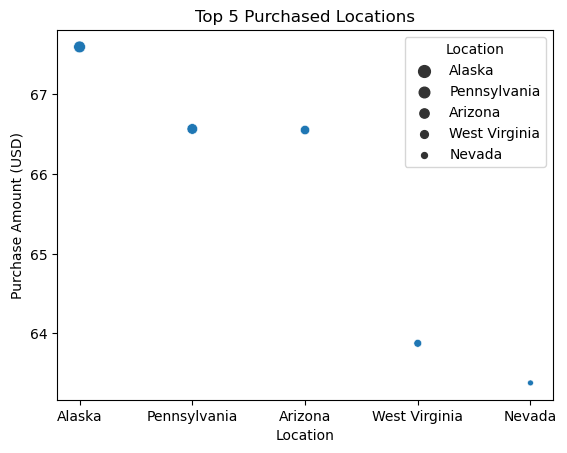

In [20]:
sns.scatterplot(x = grouped.index, y = grouped.values, size = grouped.index, data = grouped)
plt.title("Top 5 Purchased Locations")
plt.xlabel("Location")
plt.ylabel("Purchase Amount (USD)")
plt.show();

## The top 5 locations who purchase a lot are: Alaska - Pennsylvania - Arizona - West Virginia - Nevada and the top purchase location is Alaska

Question 11
Using a crosstab, find how Gender and Size interact.

Plot using sns.heatmap.

In [21]:
cross = pd.crosstab(index = df["Gender"], columns = df["Size"])
cross

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


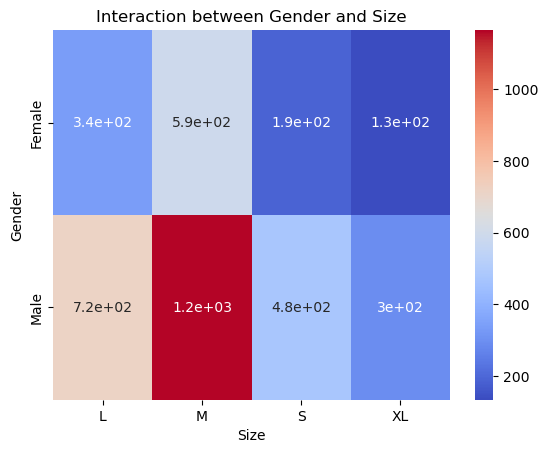

In [22]:
sns.heatmap(cross, annot = True, cmap = "coolwarm")
plt.title("Interaction between Gender and Size")
plt.show();

## The heatmap and cross table shows that man purchases for each size is larger than that for women's

Question 12
How does the frequency of purchases column influence the use of promo codes?

Create a stacked bar chart using Matplotlib and compare with a Seaborn countplot.

<Figure size 1200x1500 with 0 Axes>

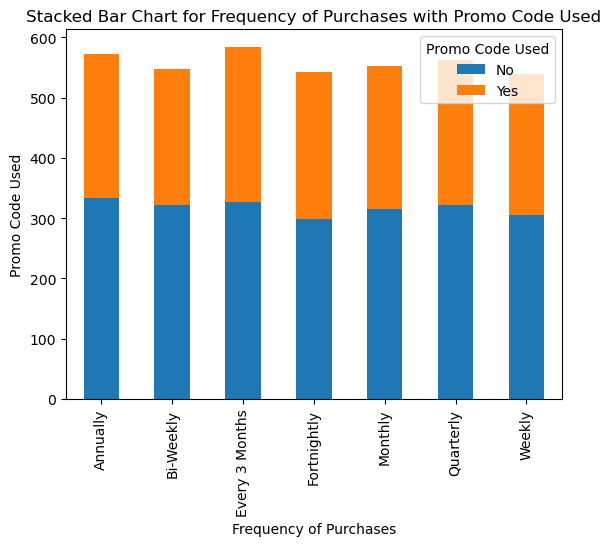

In [23]:
plt.figure(figsize = (12, 15))
pd.crosstab(index = df["Frequency of Purchases"], columns = df["Promo Code Used"]).plot(kind = "bar", stacked = True)
plt.title("Stacked Bar Chart for Frequency of Purchases with Promo Code Used")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Promo Code Used")
plt.show();

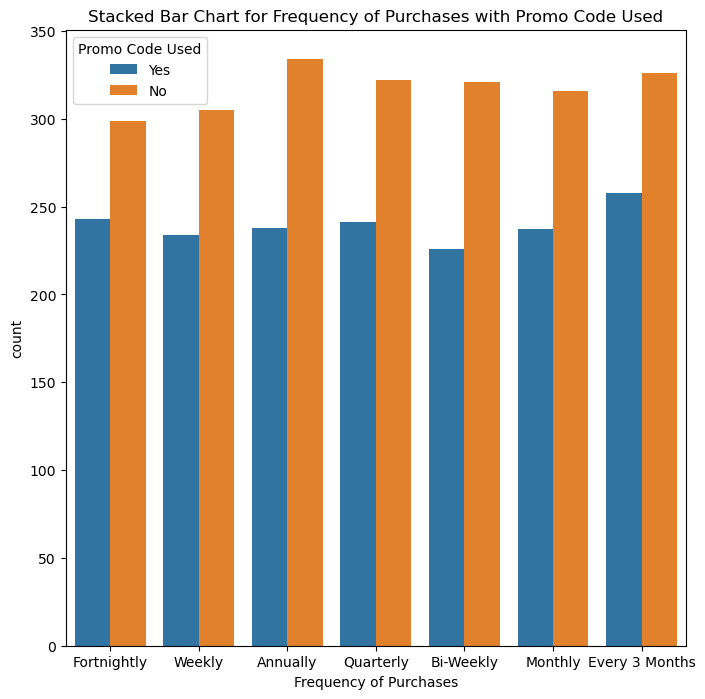

In [24]:
plt.figure(figsize = (8, 8))
sns.countplot(x = "Frequency of Purchases", hue = "Promo Code Used", data = df)
plt.title("Stacked Bar Chart for Frequency of Purchases with Promo Code Used")
plt.xlabel("Frequency of Purchases")
plt.show();

In [25]:
## Both graphes shows that  

Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by Gender.

Use sns.pairplot with hue="Gender".

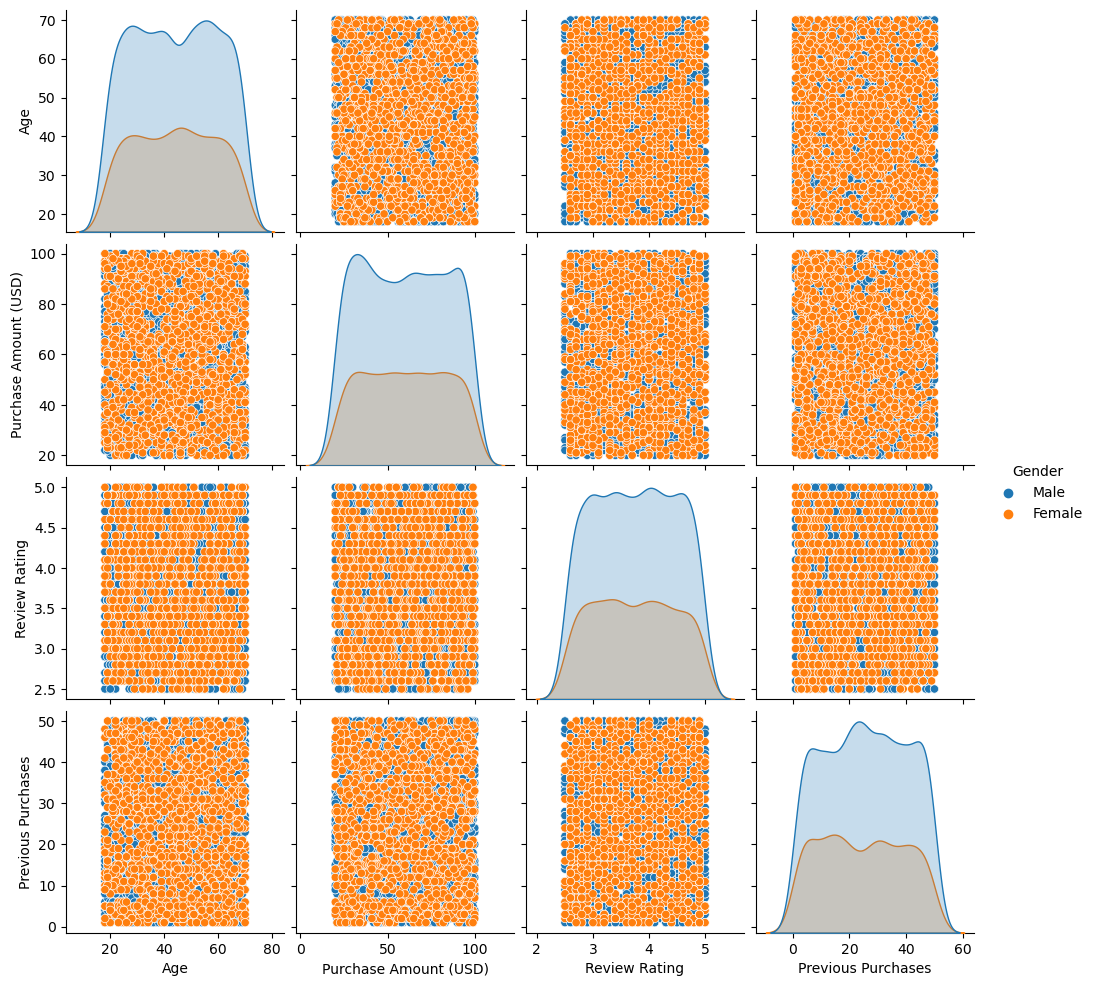

In [26]:
features = ["Gender"]
for col in numeric_features.columns:
    if col != "Customer ID":
        features.append(col)

new_df = df[features]

sns.pairplot(new_df, hue = "Gender")
plt.show();